In [1]:
import pandas as pd
df = pd.read_csv('ClusterCrops.csv')

In [2]:
df.head()

,Target,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn
0,1,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36
1,0,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56
2,0,7.1,0.16,0.52,361.4,19.52,223.10,10.23,0.72,8.56,0.32,2.64
3,1,7.5,0.16,0.56,389.2,12.76,301.30,11.20,0.70,8.60,0.26,2.82
4,1,6.8,0.75,0.72,367.4,8.40,275.05,0.90,3.60,3.14,1.01,5.43


In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15149 entries, 0 to 15148
Data columns (total 12 columns):
Target    15149 non-null int64
pH        15149 non-null float64
EC        15149 non-null float64
OC        15149 non-null float64
N         15149 non-null float64
P         15149 non-null float64
K         15149 non-null float64
S         15149 non-null float64
Zn        15149 non-null float64
Fe        15149 non-null float64
Cu        15149 non-null float64
Mn        15149 non-null float64
dtypes: float64(11), int64(1)
memory usage: 1.4 MB


In [17]:
X = train_set[['pH','EC','OC','N','P','K','S','Zn','Fe','Cu','Mn']]
Y = train_set['Target']

In [18]:
x = test_set[['pH','EC','OC','N','P','K','S','Zn','Fe','Cu','Mn']]
y = test_set['Target']

In [19]:
from sklearn import tree

In [20]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
clf.score(x, y)

0.996039603960396

In [22]:
clf.predict([[7.19630, 0.30121, 0.65623, 454.11780, 16.55183, 161.22894, 15.67676, 0.85194, 7.31720, 0.41858, 2.10993]]) 

array([0], dtype=int64)

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)


In [13]:
clf1.fit(X, Y)



MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
clf1.score(x,y)



0.3201320132013201

In [15]:
from sklearn import svm



In [16]:
clf2 = svm.SVC()
clf2.fit(X, Y)

C:\Users\Public\Anaconda3\envs\project1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
clf2.score(x,y)

0.6778877887788779

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
clf3 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf3.fit(X, Y)

C:\Users\Public\Anaconda3\envs\project1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
clf3.score(x,y)


0.401980198019802

In [5]:
import matplotlib.pyplot as plt

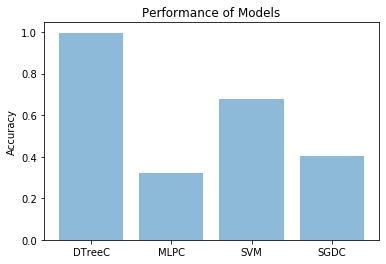

In [22]:
import numpy as np
objects = ('DTreeC','MLPC','SVM','SGDC')
y_pos = np.arange(len(objects))
performance = [0.9966996699669967, 0.3201320132013201, 0.6778877887788779, 0.401980198019802]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Performance of Models')

plt.show()

In [2]:
corr=df.corr()
corr["Target"].sort_values(ascending=False)

Target    1.000000
EC        0.172520
Mn        0.031602
Cu        0.007467
Fe        0.000226
S        -0.007059
P        -0.011182
Zn       -0.026301
K        -0.037438
pH       -0.045907
OC       -0.214474
N        -0.780779
Name: Target, dtype: float64

In [2]:
print("Skewness: %f" % df['pH'].skew())
print("Kurtosis: %f" % df['pH'].kurt())

Skewness: 53.243816
Kurtosis: 3531.429910


In [3]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

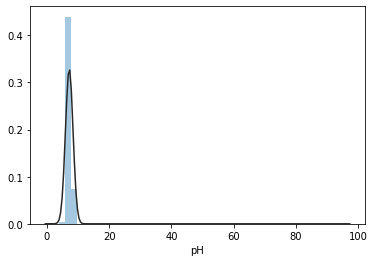

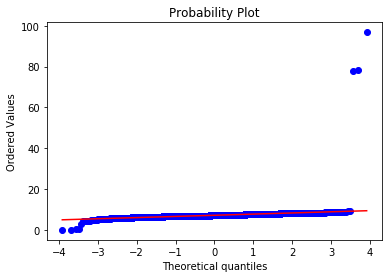

In [6]:
#histogram and normal probability plot
sns.distplot(df['pH'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['pH'], plot=plt)

In [23]:
df['pH'] = df['pH']**(1/3)

In [14]:
df.head()

,Target,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn
0,1,1.991632,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36
1,0,1.939877,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56
2,0,1.921997,0.16,0.52,361.4,19.52,223.10,10.23,0.72,8.56,0.32,2.64
3,1,1.957434,0.16,0.56,389.2,12.76,301.30,11.20,0.70,8.60,0.26,2.82
4,1,1.894536,0.75,0.72,367.4,8.40,275.05,0.90,3.60,3.14,1.01,5.43


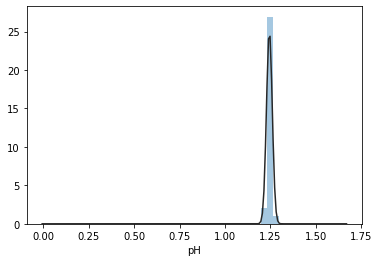

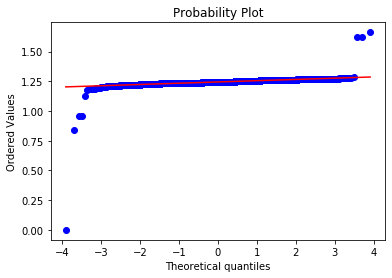

In [24]:
#histogram and normal probability plot
sns.distplot(df['pH'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['pH'], plot=plt)


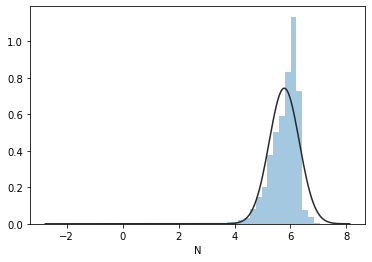

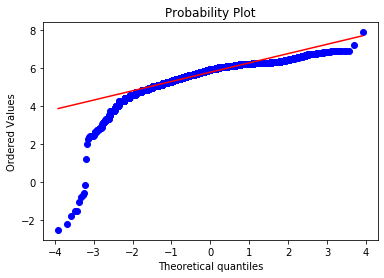

In [20]:
sns.distplot(df['N'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['N'], plot=plt)

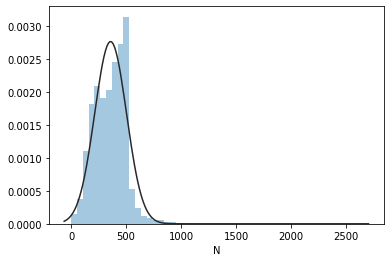

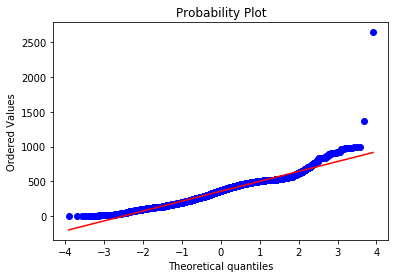

In [21]:
sns.distplot(df['N'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['N'], plot=plt)

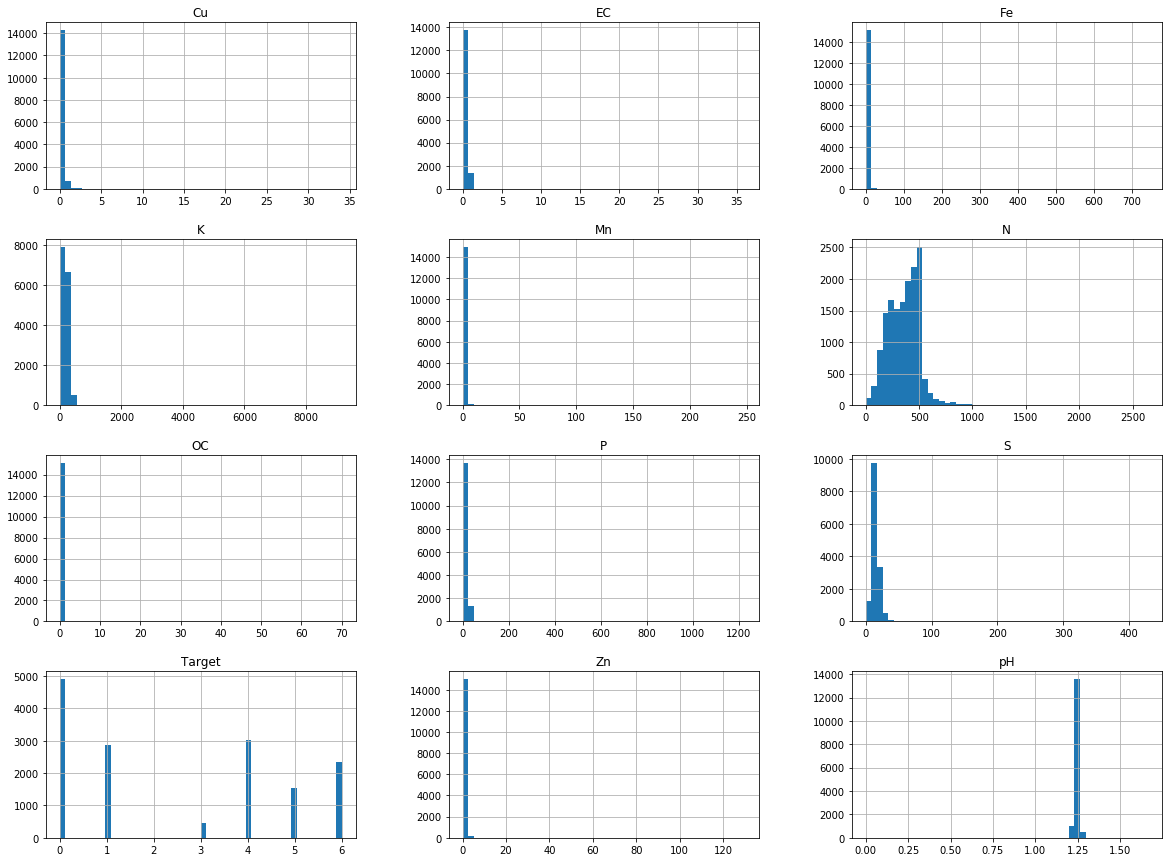

In [25]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
dfg = df.groupby([df['Target']])

In [14]:
x = dfg.mean()


In [15]:
y = dfg.median()